**André Matarazzo**

**Projeto 1 - Comparação entre dados fornecidos pelo site World Bank**

**IDH, GINI e Assassinatos por 100 mil pessoas**

        O IDH é um dado comum usado para descrever cada país ao redor do mundo. No entanto, uma vez que este somente inclui  alguns fatores, muitas vezes o IDH pode se tornar impreciso e acaba por não retratar de forma verdadeira a realidade de  um país. Desta maneira, é benéfico comparar este índice com outras medidas, tais como a taxa de disparidade social (GINI) e a quantidade de assassinatos por 100 mil pessoas.


Iniciando tal análise, uma pergunta pode ser levantada diante os dados analisados:



    --> De forma geral, o IDH mascara a disparidade social e segurança de um país?



Primeiro dado a ser analisado: IDH

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

HDI = pd.read_excel('hdi_human_development_index.xlsx')
HDI_2005 = HDI.loc[:, ["geo", 2005]]
HDI_final = HDI_2005.set_index('geo')

Segundo dado: GINI

In [59]:
GINI = pd.read_excel('inequality_index_gini.xlsx')
GINI_2005 = GINI.loc[:, ["geo", 2005]]
GINI_final = GINI_2005.set_index('geo')

Terceiro dado: Assassinatos por 100 mil pessoas

In [60]:
murders = pd.read_excel('murder_per_100000_people.xlsx')
murders_2005 = murders.loc[:, ["geo", 2005]]
murders_final = murders_2005.set_index('geo')

Agora, para melhor comparar e analisar os dados utilizados, uma tabela comparativa foi feita.

In [153]:
IDH_GINI = HDI_final.join(GINI_final, how='inner', lsuffix='_IDH', rsuffix='_GINI')
GINI_murders = GINI_final.join(murders_final, how='inner', lsuffix='_GINI', rsuffix='_murders')
IDH_murders = HDI_final.join(murders_final, how='inner', lsuffix='_GINI', rsuffix='_murders')
IDH_GINI_murders = IDH_GINI.join(murders_final, how='inner')
IDH_GINI_murders.sort_values(by=2005).dropna().tail()

#A última coluna indica o dado de assassinatos por 100 mil pessoas

,2005_IDH,2005_GINI,2005
geo,,,
Rwanda,0.404,52.0,34.4
Uganda,0.434,42.9,38.9
Colombia,0.669,53.7,41.8
El Salvador,0.651,48.5,49.7
South Africa,0.609,64.8,70.8


Após uma primeira análise na tabela gerada, é possível iniciar o processo de entendimento comportamental dos dados, e como eles se relacionam entre si. Para a quantidade de dados acima (somente 5), não é possível visualizar de forma clara relações entre dados, somente inferir ideias básicas em relação ao crescimento mútuo dos dados. A Africa do Sul por exemplo, é o país não só com o maior número de assassinatos, mas também com o maior valor de GINI. Desta forma, é correto afirmar que este comportamento é padronizado por todos os países? A resposta vem em forma de gráfico, comparando todos os dados do GINI e de assassinatos de 2005.

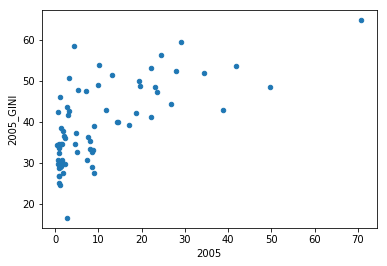

In [62]:
IDH_GINI_murders.plot.scatter(y='2005_GINI', x=2005)

A partir de uma análise a olho nu, o gráfico comprova a hipótese levantada acima, e aponta (por mais que não de forma tão precisa), uma relação entre número de assassinatos e o índice de disparidade social (GINI). Para "matematizar" tal comprovação e aumentar a confiabilidade do argumento proposto, é conveniente criar outros gráficos de análise, e julgar todos a partir do coeficiente de correlação de Pierson.

Para a mais rápida criação de gráficos com uma reta de ajuste (que nos sinaliza a relação entre os dados), uma função foi feita.

In [63]:
#para atingir essa função, foi consultado o material da aula 5, fornecido pelo professor.
def scatter_line(dados, x, y):
    

    varianciaX = dados[x].var()
    varianciaY = dados[y].var()

    meanX = dados[x].mean()
    meanY = dados[y].mean()
    
    m = dados[x].cov(dados[y]) / varianciaX
    n = meanY - m*meanX

    minimoX = dados[x].min()
    maximoX = dados[x].max()

    plt.scatter(dados[x], dados[y]) 
    plt.plot((minimoX, maximoX), (m*minimoX + n, m*maximoX + n), color='green')

    plt.title('{0} versus {1}'.format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    
    return m, n

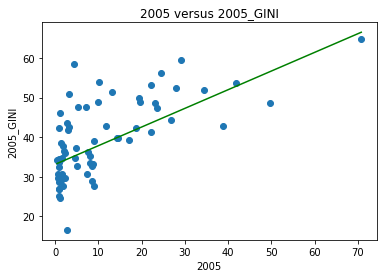

In [64]:
m, n = scatter_line(IDH_GINI_murders, y="2005_GINI", x=2005)

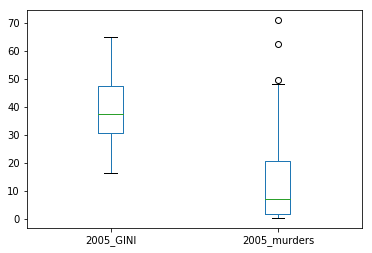

In [151]:
GINI_murders.plot.box('2005_GINI')

In [152]:
GINI_murders.loc[:, ['2005_murders', "2005_GINI"]].corr()

,2005_murders,2005_GINI
2005_murders,1.00000,0.67042
2005_GINI,0.67042,1.00000


Com um coeficiente de correlação de 0.67, a relação entre os dados pode ser considerada potencialmente padronizada a linha de tendência, onde o comportamento médio pode ser previsto de forma suficiente. O gráfico indica a presença de consideráveis outliers, porém por mais que estes afetem o coeficiente de correlação, seu efeito não é ainda prejudicial para a previsão de dados desejada pelo gráfico. Complementando pela análise do BoxPlot, é possível compreender a dispersão dos dados de cada categoria. Enquanto os dados do GINI são bem distribuídos e favorecem a construção do gráfico, os dados de assassinatos são fortemente assimétricos, com sua grande maioria no início. Assim sendo, se torna ainda mais explicável a presença de tantos pontos no início do gráfico, o que poderia potencialmente diminuir a precisão do coeficiente de correlação e do próprio gráfico em si. De forma geral, o relacionamento entre os dois fatores foi confirmado, mesmo que de forma não absoluta. 

Após relacionar dois dos três dados analisados, se torna necessário trazer o terceiro dado, e se reaproximar ao projeto com o objetivo de responder sua pergunta norteadora. Desta maneira, dois gráficos foram feitos com o novo dado (IDH), com cada coeficiente de correlação calculado.

Gráfico 1: IDH e GINI

,2005_IDH,2005_GINI
2005_IDH,1.000000,-0.481672
2005_GINI,-0.481672,1.000000


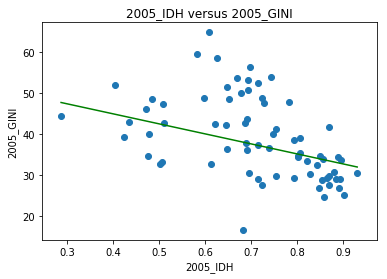

In [66]:
m, n = scatter_line(IDH_GINI_murders, y="2005_GINI", x='2005_IDH')
IDH_GINI_murders.loc[:, ['2005_IDH', "2005_GINI"]].corr()

Gráfico 2: IDH e Assassinatos por 100 mil pessoas

,2005_IDH,2005
2005_IDH,1.000000,-0.597304
2005,-0.597304,1.000000


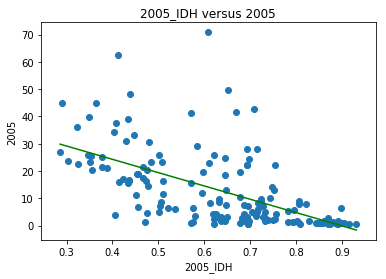

In [157]:
m, n = scatter_line(IDH_GINI_murders, y=2005, x='2005_IDH')
IDH_GINI_murders.loc[:, ['2005_IDH', 2005]].corr()

#A segunda coluna abaixo refere-se aos assassinatos (2005_murders)

   Diferente da primeira comparação feita, os dois gráficos não possuem um coeficiente de correlação suficiente, onde existe uma quantidade muito grande de outliers fora da linha desejada. Desta maneira, surge a dúvida: por mais que com uma relação não tão concreta e clara, ainda existe uma relação entre os dados em cada gráfico? 


O segundo gráfico está mais disperso, e não existe nenhuma aparente relação além daquela levantada pelo ajuste linear. Já o primeiro gráfico, com a remoção de certos outliers, um comportamento muito interessante pode ser analisado, qual é essencial para se aproximar a uma resposta da pergunta principal do trabalho.

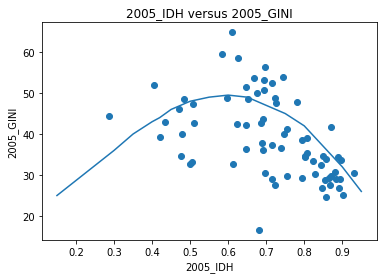

In [173]:
#Os valores de k & l abaixo não têm importância, e foram somente utilizados para ajudar na explicação.
k = [0.15,0.3,0.35, 0.4,0.42, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
l = [25,36,40, 43,44, 46, 48, 49, 49.5, 49, 47, 45, 42, 37, 32,26]

def parabola(dados, x, y):
    
    plt.scatter(dados[x], dados[y]) 
    plt.plot(k, l)

    plt.title('{0} versus {1}'.format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    
    return m, n
m, n = parabola(IDH_GINI_murders, y="2005_GINI", x='2005_IDH')

#Novamente, a parábola abaixo é meramente ilustrativa, com o intuito de facilitar a visualização do argumento explicado abaixo.

Se ao invés de uma linha de aproximação uma parábola de aproximação fosse gerada, o comportamento iria ser descrito de forma muito mais precisa, e um suposto coeficiente de correlação parabólico seria um número mais alto do que o atingido anteriormente (de 0.48). Desta forma, a relação entre o GINI e o IDH não é uma relação linear, mas sim parabólica, e que contém razões para tal. Em viés de uma análise mais profunda, os motivos para este comportamento se encaixa na resposta da própria pergunta norteadora, onde tal acontece devido ao exato "mascaramento" do IDH diante a disparidade social de um país.

Se aproximando a uma conclusão, é conveniente refazer a pergunta norteadora, para respondê-la a partir das análises feitas.

**De forma geral, o IDH mascara a disparidade social e segurança de um país?**

A partir da análise dos dados, pode se concluir que o IDH mascara a disparidade social de um país, porém se mantêm potencialmente "justo" a sua segurança. Tal conclusão pode ser feita a partir do último gráfico demonstrado acima, onde a melhor descrição para o relacionamento entre IDH e GINI seria uma parábola. Conforme a disparidade social aumenta, o IDH não necessariamente diminui, mas aumenta até um ponto, e então começa a descer. Este comportamento, por mais que com um viés interpretativo, sugere o fato de que quando a disparidade social cresce muito, como é o caso da África do sul, o IDH não é capaz de perceber tal, e se mantém alto. Isto ocorre pelo fato de que em países como este (África do Sul), a diferença monetária é muito grande, onde quase todo o dinheiro (falando em ponto de vista percentual) está em uma parte muito pequena da população, muitas vezes em 1 ou menos porcento. Desta forma, a média de dinheiro per capta fica longe da realidade, não retratando de forma efetiva o que acontece em cada país. Se um gráfico de frequência com o dinheiro de cada cidadão da África do Sul pudesse ser feito, poderia ser vista uma absurda assimetria à direita. Já quando a disparidade não é tão grande, a média fica mais próxima da realidade, e o IDH é mais "fiel". Tal pode ser visto nos países com menor IDH, que possuem um GINI próximo dos países com maior disparidade e possuem um IDH baixo, como a hipótese inicial implica que deveria acontecer. Já nos países com muita disparidade, vistos na segunda tabela, o IDH sobe de forma brusca, validando de forma nítida a resposta que, de fato, o IDH mascara a disparidade social.

In [69]:
IDH_GINI.sort_values(by='2005_IDH').dropna().head()

,2005_IDH,2005_GINI
geo,,
Niger,0.286,44.4
Rwanda,0.404,52.0
Senegal,0.422,39.2
Uganda,0.434,42.9
Solomon Islands,0.470,46.1


In [70]:
IDH_GINI.sort_values(by='2005_GINI').dropna().tail()

,2005_IDH,2005_GINI
geo,,
Panama,0.744,53.9
Brazil,0.698,56.3
Bolivia,0.625,58.5
Honduras,0.583,59.5
South Africa,0.609,64.8


Já olhando a questão da segurança, ela se manteve mais próxima de uma reta, como pode ser visto nos dados analisados previamente no projeto. Assim sendo, ela indica que o IDH, um medidor geral para a "qualidade de vida" de um país, cresce ao mesmo tempo que os assassinatos diminuem, algo que então retrata a realidade de um país de forma correta. A razão para tal ocorrência não pode ser diretamente encontrada, mas pode ser explicada por tendência de que, quando um país tem uma baixa taxa de alfabetização, baixa esperança de vida e/ou uma baixa renda (medidores do IDH), consequentemente o país tende a ser mais perigoso.

Para confirmar as respostas levantadas acima, é muito conveniente analisar um país específico ao longo dos anos, e analisar como o IDH e GINI se comportam em cada um.

In [71]:
HDI_1990 = HDI.loc[:, ["geo", 1990]]
GINI_1990 = GINI.loc[:, ["geo", 1990]]
HDI_1990f = HDI_1990.set_index('geo')
GINI_1990f = GINI_1990.set_index('geo')
IDH_GINI_1990 = HDI_1990f.join(GINI_1990f, how='inner', lsuffix='_IDH', rsuffix='_GINI')
IDH_GINI_X = IDH_GINI_1990.join(IDH_GINI, how='inner', lsuffix='_IDH', rsuffix='_GINI')
IDH_GINI_X.sort_values(by='1990_GINI').dropna().tail()

,1990_IDH,1990_GINI,2005_IDH,2005_GINI
geo,,,,
Bolivia,0.435,42.0,0.625,58.5
Iran,0.572,43.6,0.692,43.6
Costa Rica,0.653,45.3,0.727,47.5
Honduras,0.507,57.4,0.583,59.5
Brazil,0.611,60.5,0.698,56.3


Como pode ser vistos nos dados de 1990, 15 anos antes dos dados analisados, o comportamento descrito pela relação IDH e GINI se manteve, confirmando a resposta para a pergunta levantada. A Bolívia, que possui um IDH de 0.625 em 2005, tem uma disparidade social de 58.5, uma das mais altas do planeta na época. Já em 1990, quando possuia uma disparidade social mais baixa de 42, o IDH já diminuiu de forma muito considerável, caindo para 0.435. Enquanto um gráfico linear sugeriria o aumento do IDH de acordo com a queda do GINI, a conclusão baseada na interpretação analítica explica o comportamento contrário, que é exatamente o que aconteceu na ocasião. Quanto menor a disparidade, mais preciso é o cálculo do IDH, uma vez que pensando na média do PIB per capita.

Ainda assim, é importante ressaltar que a conclusão atingida pode ser utilizada para casos mais drásticos (com GINI mais alto), e então não é absoluta. Em alguns casos, como nos de Costa Rica, Honduras e Brasil, a relação IDH-GINI continuou linear, obedecendo a primeira solução imposta no gráfico inicial. Isto pode ter ocorrido devido ao fato da médias monetárias não serem de fato distorcidas, mas muito próximas da realidade e com um gráfico de frequência do PIB per capita simétrico. Além disso, a mudança do GINI pode também não ser um fator direto para a mudança do IDH, logo que, como pode ser visto nos exemplos acima, as mudanças no GINI foram muito sutis.